In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import itertools

In [2]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [3]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [4]:
path_local_csv = '/Users/mharias/Documents/proyectos/covid/vacunacion/csv/'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [5]:
datos_row = pd.read_csv(path_escovid19data_csv)

In [6]:
datos_row = pd.read_csv(path_escovid19data_csv+'estado_vacunacion_.csv')

In [9]:
dia = '5/7/21' # dia del informe
#dia = datetime.today().strftime(format='%-d/%-m/%y')
un_dia = timedelta(days=1)
today = dia

In [10]:
dia

'5/7/21'

In [11]:
datos_row

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,5/7/21,Ceuta,49950.0,7900.0,15100.0,2950.0,75900,72717,0.958063,44831.0,31925.0,NaN,2/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2670,5/7/21,Melilla,49950.0,7800.0,15100.0,2950.0,75800,66449,0.876636,40710.0,31135.0,NaN,1/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2671,5/7/21,Fuerzas Armadas,46392.0,16300.0,106100.0,2000.0,170792,147742,0.865041,85038.0,63611.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2672,5/7/21,Sanidad Exterior,0.0,2490.0,0.0,2030.0,4520,1744,0.385841,1526.0,823.0,NaN,2/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [12]:
datos_row = datos_row[datos_row['ccaa']!='Fuerzas Armadas']
datos_row = datos_row[datos_row['ccaa']!='Sanidad Exterior']

In [13]:
datos_row

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source
0,4/1/21,Andalucía,NaN,NaN,NaN,NaN,140295,25809,0.183962,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 19,https://www.mscbs.gob.es/profesionales/saludPu...
1,4/1/21,Aragón,NaN,NaN,NaN,NaN,23715,2004,0.084503,NaN,NaN,2/1/21,2/1/21,Ministerio de Sanidad - Vacuna Covid 20,https://www.mscbs.gob.es/profesionales/saludPu...
2,4/1/21,Asturias,NaN,NaN,NaN,NaN,23720,9380,0.395447,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 21,https://www.mscbs.gob.es/profesionales/saludPu...
3,4/1/21,Baleares,NaN,NaN,NaN,NaN,8940,153,0.017114,NaN,NaN,28/12/20,28/12/20,Ministerio de Sanidad - Vacuna Covid 22,https://www.mscbs.gob.es/profesionales/saludPu...
4,4/1/21,Canarias,NaN,NaN,NaN,NaN,20835,4846,0.232589,NaN,NaN,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 23,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,5/7/21,Navarra,457035.0,68600.0,113700.0,23350.0,662685,631577,0.953058,382567.0,285480.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2668,5/7/21,País Vasco,1600380.0,222600.0,380800.0,78550.0,2282330,2178637,0.954567,1330626.0,965800.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2669,5/7/21,Ceuta,49950.0,7900.0,15100.0,2950.0,75900,72717,0.958063,44831.0,31925.0,NaN,2/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2670,5/7/21,Melilla,49950.0,7800.0,15100.0,2950.0,75800,66449,0.876636,40710.0,31135.0,NaN,1/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


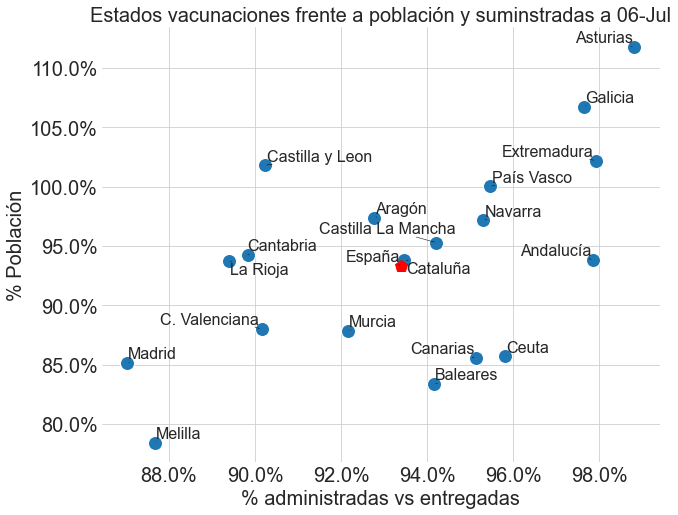

In [14]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
vacunas_poblacion = datos['Dosis administradas'].sum()/datos['poblacion'].sum()


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='vacunas_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'vacunas_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,vacunas_poblacion, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,vacunas_poblacion,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('% Población',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones frente a población y suminstradas a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig(path_img+'estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


Ciclos terminados..

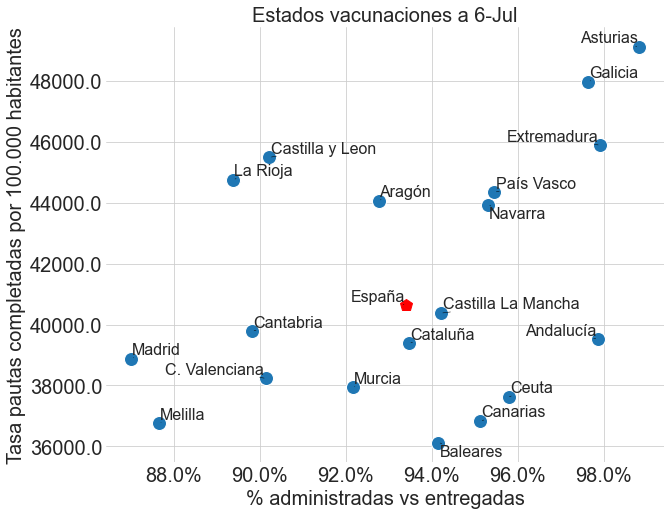

In [15]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%-d-%b')

datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
pauta_espanna = datos['Total pauta completada'].sum()/datos['poblacion'].sum()*100000


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='pauta_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1f}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'pauta_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,pauta_espanna, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,pauta_espanna,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('Tasa pautas completadas por 100.000 habitantes',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig(path_img+'estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


# Vacunas por poblacion

In [16]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
2652,5/7/21,Andalucía,5493240.0,833000.0,1455800.0,299300.0,8081340,7908236,0.978580,4740714.0,3329693.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,0.938507,39514.988895
2653,5/7/21,Aragón,974925.0,136100.0,228700.0,46800.0,1386525,1286210,0.927650,764348.0,582092.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,0.973816,44071.369192
2654,5/7/21,Asturias,831605.0,113200.0,175400.0,36100.0,1156305,1142562,0.988115,679509.0,502005.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,1.117646,49105.784741
2655,5/7/21,Baleares,702360.0,106600.0,201400.0,41300.0,1051660,990169,0.941530,610025.0,429101.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,0.833615,36125.633734
2656,5/7/21,Canarias,1333770.0,199900.0,374400.0,76900.0,1984970,1888288,0.951293,1158885.0,812995.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,0.855503,36833.354098
2657,5/7/21,Cantabria,430125.0,59700.0,100200.0,20550.0,610575,548450,0.898252,331622.0,231394.0,NaN,1/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,0.942866,39780.018017
2658,5/7/21,Castilla y Leon,1946595.0,273800.0,411900.0,84650.0,2716945,2451476,0.902291,1460712.0,1095429.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,1.018020,45489.669584
2659,5/7/21,Castilla La Mancha,1422585.0,212900.0,350900.0,72375.0,2058760,1939597,0.942119,1187133.0,821788.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,0.952882,40372.683929
2660,5/7/21,Cataluña,5221160.0,762200.0,1338100.0,274850.0,7596310,7100319,0.934706,4318671.0,2979248.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,0.938563,39381.480665
2661,5/7/21,C. Valenciana,3322990.0,486400.0,869800.0,178800.0,4857990,4379539,0.901513,2634927.0,1901688.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,0.880402,38228.918630


In [17]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
2652,5/7/21,Andalucía,5493240.0,833000.0,1455800.0,299300.0,8081340,7908236,0.978580,4740714.0,3329693.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,0.938507,39514.988895
2653,5/7/21,Aragón,974925.0,136100.0,228700.0,46800.0,1386525,1286210,0.927650,764348.0,582092.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,0.973816,44071.369192
2654,5/7/21,Asturias,831605.0,113200.0,175400.0,36100.0,1156305,1142562,0.988115,679509.0,502005.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,1.117646,49105.784741
2655,5/7/21,Baleares,702360.0,106600.0,201400.0,41300.0,1051660,990169,0.941530,610025.0,429101.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,0.833615,36125.633734
2656,5/7/21,Canarias,1333770.0,199900.0,374400.0,76900.0,1984970,1888288,0.951293,1158885.0,812995.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,0.855503,36833.354098
2657,5/7/21,Cantabria,430125.0,59700.0,100200.0,20550.0,610575,548450,0.898252,331622.0,231394.0,NaN,1/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,0.942866,39780.018017
2658,5/7/21,Castilla y Leon,1946595.0,273800.0,411900.0,84650.0,2716945,2451476,0.902291,1460712.0,1095429.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,1.018020,45489.669584
2659,5/7/21,Castilla La Mancha,1422585.0,212900.0,350900.0,72375.0,2058760,1939597,0.942119,1187133.0,821788.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,0.952882,40372.683929
2660,5/7/21,Cataluña,5221160.0,762200.0,1338100.0,274850.0,7596310,7100319,0.934706,4318671.0,2979248.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,0.938563,39381.480665
2661,5/7/21,C. Valenciana,3322990.0,486400.0,869800.0,178800.0,4857990,4379539,0.901513,2634927.0,1901688.0,NaN,4/7/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,0.880402,38228.918630


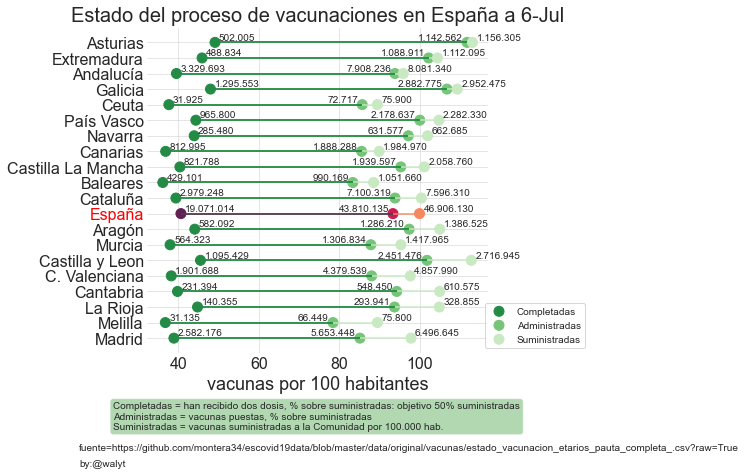

In [39]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= 'Estado del proceso de vacunaciones en España'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100*datos['Total pauta completada']/datos['poblacion']
datos.loc[:,'ratio_suministradas'] = 100*datos['Dosis administradas']/datos['Dosis entregadas']

autor='@walyt'
fuente ='fuente: https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210331.ods'
fuente = 'fuente={}'.format(path_escovid19data_csv)
poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa,
                      'ratio_suministradas' : administradas_españa/entregadas_españa*100 #quitarla
                     
                     },
                      ignore_index = True)

#datos=datos.sort_values('vacunas_poblacion').copy()
datos=datos.sort_values('ratio_suministradas').copy() #quitarla


colores = sns.color_palette("Greens_r",3)

colores_bolas = sns.color_palette("Greens_r",3)
colores_rojos = sns.color_palette('rocket',3)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)


c = [colores_bolas[0]  if datos.loc[i,'ccaa']!='España' else colores_rojos[0] for i in datos.index]
ax.scatter(datos['pauta_poblacion'], my_range, color=c, alpha=1 ,s=100, label='Completadas')
ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=c,linewidth=2, alpha=0.7)
c = [colores_bolas[1]  if datos.loc[i,'ccaa']!='España' else colores_rojos[1] for i in datos.index]
ax.scatter(datos['tasa_administradas'], my_range, color=c, alpha=1 ,s=100, label='Administradas')

c = [colores_bolas[2]  if datos.loc[i,'ccaa']!='España' else colores_rojos[2] for i in datos.index]
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=c,linewidth=2, alpha=0.7)
ax.scatter(datos['vacunas_poblacion'], my_range, color=c, alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    
    porcentaje_pautas = datos.loc[i,'Total pauta completada'] # quitarla
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas'] 
    porcentaje_entregadas = datos.loc[i,'Dosis administradas'] #quitarla
    
    '''ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+1,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas']-1,
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.1f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+1,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    
    
    '''
    
    
    
    ax.text(s='{:0,.0f}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+1,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas']-1,
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'Dosis entregadas']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+1,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)

datos[datos['ccaa']=='']
ax.get_yticklabels()[datos.index.get_loc(datos[datos['ccaa']=='España'].index.values[0])].set_color("red")


ax.legend(loc=4,bbox_to_anchor=(1.3,-0))
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v).replace(',','.')))

ax.set_title(title+' a {}'.format(today),fontsize=20)

ax.set_xlabel('vacunas por 100 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

textstr = '\n'.join((
    'Completadas = han recibido dos dosis, % sobre suministradas: objetivo 50% suministradas',
     'Administradas = vacunas puestas, % sobre suministradas',
    'Suministradas = vacunas suministradas a la Comunidad por 100.000 hab.',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.3)

# place a text box in upper left in axes coords .65, .35
ax.text(-.2,-.3,fuente,transform=ax.transAxes, fontsize=10,ha='left')
ax.text(-.1, -.15, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
ax.text(-.2,-.35,'by:'+autor, transform=ax.transAxes, fontsize=10)
f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'suministrada_admin_pauta.png',dpi=144)


## Dashboard

In [20]:
datos = datos_row.copy()

In [21]:
datos.loc[:,'ccaa'] = datos.apply(lambda x:'España' if x['ccaa']=='Totales' else x['ccaa'] ,axis=1)

In [22]:
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)

In [23]:
datos.loc[:,'Tasa entregadas'] = 100000*datos['Dosis entregadas']/datos['poblacion']


In [24]:
datos.loc[:,'Tasa administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']


In [25]:
datos.loc[:,'Tasa pautas'] = 100000*datos['Total pauta completada']/datos['poblacion']


In [26]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [27]:
primer_dia = datos['date_pub'][0]
ultimo_dia = list(datos['date_pub'])[-1]

In [28]:
lista_dias =  pd.date_range(primer_dia, end = ultimo_dia).tolist()
lista_dias = datos['date_pub'].unique().astype('datetime64[s]').tolist()

In [29]:
un_dia=timedelta(days=1)

In [30]:
n_dias = (list(datos['date_pub'])[-1]-datos['date_pub'][0]).days

In [31]:
n_dias

171

Vamos a generar una tabla con los siguientes valores para las tres variables suministradas, administradas y pautas completas:
* valores últimas 24 horas
* valores última semana
* media última semana
* valores desde principio
* desde principio

In [32]:
columnas = ['ccaa','poblacion','Dosis entregadas','Tasa entregadas',
         'Dosis administradas','Tasa administradas',
        'Total pauta completada','Tasa pautas']

In [33]:
columns = ['Dia_entregadas','Total_entregadas',
           'Dia_administradas','Total_administradas',
           'Dia_pautas','Total_pautas']

In [34]:
#columns = pd.MultiIndex.from_product([['Entregadas','Administradas','Pautas'],['Hoy','Semana','Total']])

In [35]:
for comunidad in datos['ccaa'].unique():
    ayer = ultimo_dia-un_dia if ultimo_dia.dayofweek!=0 else ultimo_dia-3*un_dia
    entregadas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
    administradas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
    pautas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    valores=[entregadas_hoy,entregadas_semana,entregadas_total,
        administradas_hoy,administradas_semana,administradas_total,
        pautas_hoy,pautas_semana,pautas_total]
    tabla.loc[comunidad]=valores

NameError: name 'tabla' is not defined

In [ ]:
indices = [i for i in itertools.product(lista_dias,datos['ccaa'].unique())]
tabla_row = pd.DataFrame(columns=columns,index=pd.MultiIndex.from_tuples(indices).set_names(['fecha','ccaa']))

In [36]:
for indice in range(len(lista_dias)-1):
    #print (dia)
    for comunidad in datos['ccaa'].unique():
        #print (comunidad)
        dia = lista_dias[indice+1] 
        ayer = lista_dias[indice]
        entregadas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
        entregadas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
        administradas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
        administradas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
        pautas_dia = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
        pautas_total = datos.loc[(datos['date_pub']==dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
        
        
        valores=[entregadas_dia,entregadas_total,
                 administradas_dia,administradas_total,
                 pautas_dia,pautas_total]
        tabla_row.loc[(dia,comunidad),columns]=valores

NameError: name 'tabla_row' is not defined

In [37]:
tabla = tabla_row.copy().reset_index()

NameError: name 'tabla_row' is not defined

In [38]:
tabla

NameError: name 'tabla' is not defined

In [39]:
def colores(x):
    df = tabla.copy()
    df.loc[:,('Dia_entregadas',slice(None))] = 'color : midnightblue'
    df.loc[:,('Administradas',slice(None))] = 'color : darkviolet'
    df.loc[:,('Pautas',slice(None))] = 'color : darkgreen'
    return df

In [40]:
def colores(x):
    df = tabla.copy()
    df.loc[:,'Dia_entregadas'] = 'color : midnightblue'
    df.loc[:,'Dia_administradas'] = 'color : darkviolet'
    df.loc[:,'Dia_pautas'] = 'color : darkgreen'
    return df

In [41]:

from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center"),
                               ("color",'black')]),
    dict(selector="caption", props=[("font-size", "200%"),
                                    ("color",'black'),
                                    ("caption-side", "bottom"),
                                    ("text-align", "center")]) ]

estilo_columnas = {
    'Dia_entregadas': [dict(selector='td', props=[('color', 'green')])],
    'Dia_administradas': [dict(selector='td', props=[('color', 'red')])],
    }
html = (tabla.style.set_table_styles(styles)
          .set_properties(**{'color': 'navy',
                           'border-color': 'white'}).format(lambda x: '{:,.0f}'.format(x).replace(',','.')).\
                            set_caption('Valores Vacunación a {} tras {} días de campaña'.format(ultimo_dia.strftime('%-d %b'),n_dias)).
        set_table_styles(estilo_columnas,overwrite=False)).apply(colores,axis=None)
html

NameError: name 'tabla' is not defined

# Gráficos con las nuevas series: vacunaciones completas

In [19]:
path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [20]:
datos_raw= pd.read_csv(path_github_csv)

In [21]:
datos = datos_raw.copy()

In [22]:
datos.tail()

,date_pub,ccaa,Personas pauta completa >=80 años,Población INE>=80 años,%,Personas pauta completa 70-79 años,Población INE70-79 años,%.1,Personas pauta completa 60-69 años,Población INE60-69 años,...,Población INE18-24 años,%.5,16-17 años,Población INE16-17 años,%.6,Total Personas pauta completa,Total Población INE Población a Vacunar (1),% pauta completa sobre Población a Vacunar INE,source_name,source
1201,18/6/21,Ceuta,2315,NaN,0.8886756238003839,3687,NaN,0.85386753126447434,2421,NaN,...,NaN,0.067009629336499149,8,NaN,0.0036781609195402297,24987,66158,0.37768674990175033,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1202,18/6/21,Melilla,1863,NaN,0.7931034482758621,2984,NaN,0.79615795090715047,3024,NaN,...,NaN,0.035262417994376759,6,NaN,0.0025817555938037868,23965,66178,0.36212940856477982,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1203,18/6/21,Fuerzas Armadas,12,NaN,-,6,NaN,-,1283,NaN,...,NaN,-,4,NaN,-,34759,-,-,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1204,18/6/21,Sanidad Exterior,0,NaN,-,0,NaN,-,0,NaN,...,NaN,-,0,NaN,-,0,-,-,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1205,18/6/21,Total España,2863600,NaN,1.0,3805496,NaN,0.96097291823704023,1532725,NaN,...,NaN,0.053042942646570598,2569,NaN,0.0027069202960015764,13939564,40129822,0.34736172016910516,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [85]:
datos.columns

Index(['date_pub', 'ccaa', 'Personas pauta completa >=80 años',
       'Población INE>=80 años', '%', 'Personas pauta completa 70-79 años',
       'Población INE70-79 años', '%.1', 'Personas pauta completa 60-69 años',
       'Población INE60-69 años', '%.2', 'Personas pauta completa 50-59 años',
       'Población INE50-59 años', '%.3', 'Personas pauta completa 25-49 años',
       'Población INE25-49 años', '%.4', 'Personas pauta completa 40-49 años',
       '%.4.1', 'Personas pauta completa 25-39 años', '%.4.2', '18-24 años',
       'Población INE18-24 años', '%.5', '16-17 años',
       'Población INE16-17 años', '%.6', 'Total Personas pauta completa',
       'Total Población INE Población a Vacunar (1)',
       '% pauta completa sobre Población a Vacunar INE', 'source_name',
       'source'],
      dtype='object')

In [59]:
datos = datos[['date_pub', 'ccaa','%',  '%.1',  '%.2','%.3', '%.4.1', '%.4.2',  '%.5','%.6','% pauta completa sobre Población a Vacunar INE']]

In [86]:
datos

,date_pub,ccaa,Personas pauta completa >=80 años,Población INE>=80 años,%,Personas pauta completa 70-79 años,Población INE70-79 años,%.1,Personas pauta completa 60-69 años,Población INE60-69 años,...,Población INE18-24 años,%.5,16-17 años,Población INE16-17 años,%.6,Total Personas pauta completa,Total Población INE Población a Vacunar (1),% pauta completa sobre Población a Vacunar INE,source_name,source
0,31/3/21,Andalucía,240454,413516,0.5814865688389325,12788,650381,0.019662321008762557,41807,916147,...,625846,0.018677118652192393,83,181921,0.0004562419951517417,507430,7062213,0.0718514154132706,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1,31/3/21,Aragón,40245,98807,0.40730919874097987,3048,118955,0.025623134798873525,9273,156367,...,89180,0.015934065934065933,25,25106,0.0009957779016968055,89278,1132764,0.07881429847699963,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
2,31/3/21,Asturias,37353,87826,0.4253068567394621,3490,109249,0.031945372497688765,9709,149652,...,54179,0.04263644585540523,24,15563,0.0015421191287026924,87093,901209,0.09664018002483331,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
3,31/3/21,Baleares,12403,49542,0.2503532356384482,2088,80516,0.025932733866560684,4856,117231,...,85839,0.014317501368841669,30,23300,0.0012875536480686696,45509,986279,0.04614211597326923,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
4,31/3/21,Canarias,31183,90236,0.34557161221685356,11216,154531,0.07258090609651138,9016,235092,...,163899,0.014331997144582944,19,44352,0.0004283910533910534,104712,1871033,0.055964806606831626,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,18/6/21,Ceuta,2315,NaN,0.8886756238003839,3687,NaN,0.85386753126447434,2421,NaN,...,NaN,0.067009629336499149,8,NaN,0.0036781609195402297,24987,66158,0.37768674990175033,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1202,18/6/21,Melilla,1863,NaN,0.7931034482758621,2984,NaN,0.79615795090715047,3024,NaN,...,NaN,0.035262417994376759,6,NaN,0.0025817555938037868,23965,66178,0.36212940856477982,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1203,18/6/21,Fuerzas Armadas,12,NaN,-,6,NaN,-,1283,NaN,...,NaN,-,4,NaN,-,34759,-,-,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...
1204,18/6/21,Sanidad Exterior,0,NaN,-,0,NaN,-,0,NaN,...,NaN,-,0,NaN,-,0,-,-,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...


In [61]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [62]:
datos['date_pub']

0      2021-03-31
1      2021-03-31
2      2021-03-31
3      2021-03-31
4      2021-03-31
          ...    
1201   2021-06-18
1202   2021-06-18
1203   2021-06-18
1204   2021-06-18
1205   2021-06-18
Name: date_pub, Length: 1206, dtype: datetime64[ns]

In [63]:
hoy = datetime.today()
hoy = datetime (year=2021,month=6,day = 24)
hoy_str = hoy.strftime('%Y-%m-%d')
hoy_titulo = hoy.strftime('%d/%m')

In [64]:
datos = datos[datos['date_pub'] == hoy_str]

In [65]:
datos

,date_pub,ccaa,%,%.1,%.2,%.3,%.4.1,%.4.2,%.5,%.6,% pauta completa sobre Población a Vacunar INE


In [68]:
datos = datos [['ccaa', '%','%.1', '%.2', '%.3','%.4.1','%.4.2', '%.5','%.6','% pauta completa sobre Población a Vacunar INE']]

In [66]:
datos.columns = ['ccaa','>80','70-79','60-69','50-59','25-49','18-24','16-17','Pob Objetivo']

ValueError: Length mismatch: Expected axis has 11 elements, new values have 9 elements

In [69]:
datos.columns = ['ccaa','>80','70-79','60-69','50-59','40-49','25-39','18-24','16-17','Pob Objetivo']

In [70]:
datos.set_index('ccaa',inplace=True)

In [71]:
datos = datos[~datos.index.isin(['Fuerzas Armadas','Sanidad Exterior'])]

In [72]:
for columna in datos.columns:
    datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])

In [73]:
datos

,>80,70-79,60-69,50-59,40-49,25-39,18-24,16-17,Pob Objetivo
ccaa,,,,,,,,,


In [74]:
np.arange(0,1,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [44]:
rango_valores = np.arange(0,1,.05)
#ocean_r summer_r
colores = sns.color_palette("ocean_r",len(rango_valores)+1)

cmap, norm = colors.from_levels_and_colors(
    rango_valores, 
    colores,extend = 'both')

color_texto = 'black'
titulo = 'Pautas completas sobre poblacion objetivo por rango edades y comunidades a {}'.format(hoy_titulo)
fuente = 'Fuente: {}'.format(path_github_csv)
autor='@walyt'

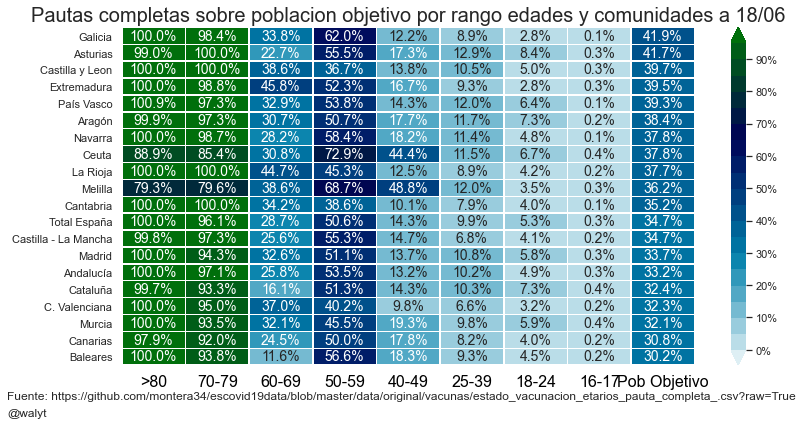

In [45]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
datos = datos.sort_values('Pob Objetivo',ascending=False)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(datos, annot=True, fmt='0.1%',linewidths=.5, cmap=cmap,cbar=True,norm=norm,annot_kws={"fontsize":14,'weight':'normal'},ax=ax)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.set_title(titulo,fontsize=20)
f.subplots_adjust(top=.9,bottom=.2)
ax.text(-.2,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')
ax.text(-.2,-.15,autor, transform=ax.transAxes, fontsize=12)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cbar.set_ticklabels(["0%","10%","20%","30%","40%",'50%','60%','70%','80%','90%','100%'])

# here set the labelsize by 20

#cbar.ax.set_yticklabels([12])
f.tight_layout()
f.savefig(path_img+'heatmap_vacunas_completas_comunidades_edades.png',dpi=144)

# Gráficos con las nuevas series: vacunaciones simples

In [46]:
path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
path_escovid19data_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [59]:
datos_raw= pd.read_csv(path_github_csv)
datos = datos_raw.copy()

In [60]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [61]:
hoy = datetime.today()
hoy = datetime (year=2021,month=6,day=16)
hoy_str = hoy.strftime('%Y-%m-%d')
hoy_titulo = hoy.strftime('%d/%m')

In [62]:
datos = datos[datos['date_pub'] == hoy_str]

In [63]:
datos.columns

Index(['date_pub', 'ccaa', 'Personas con al menos 1 dosis >=80 años',
       'Población INE>=80 años', '%',
       'Personas con al menos 1 dosis 70-79 años', 'Población INE70-79 años',
       '%.1', 'Personas con al menos 1 dosis 60-69 años',
       'Población INE60-69 años', '%.2',
       'Personas con al menos 1 dosis 50-59 años', 'Población INE50-59 años',
       '%.3', 'Personas con al menos 1 dosis 25-49 años',
       'Población INE25-49 años', '%.4',
       'Personas con al menos 1 dosis 40-49 años', '%.4.1',
       'Personas con al menos 1 dosis 25-39 años', '%.4.2', '18-24 años',
       'Población INE18-24 años', '%.5', '16-17 años',
       'Población INE16-17 años', '%.6', 'Total Personas con al menos 1 dosis',
       'Total Población INE Población a Vacunar (1)',
       '% Con al menos 1 dosis sobre Población a Vacunar INE', 'source_name',
       'source'],
      dtype='object')

In [64]:
datos = datos [['ccaa', '%','%.1', '%.2', '%.3','%.4.1','%.4.2', '%.5','%.6','% Con al menos 1 dosis sobre Población a Vacunar INE']]

In [65]:
datos.columns = ['ccaa','>80','70-79','60-69','50-59','40-49','25-39','18-24','16-17','Pob Objetivo']

In [66]:
datos

,ccaa,>80,70-79,60-69,50-59,40-49,25-39,18-24,16-17,Pob Objetivo
1140,Andalucía,1.0,0.98776563275987461,0.93606157090510589,0.86643462835794816,0.4666713353557902,0.12674948145840553,0.069539471371551462,0.003496022998994069,0.55551694631696891
1141,Aragón,1.0,0.98981127317052664,0.9428012304386475,0.84526343397254189,0.42749007876506795,0.14906982780998529,0.087272931150482166,0.0031466581693619057,0.58931781024114471
1142,Asturias,1.0,1.0,0.93980701895063212,0.85716130222263209,0.51486589258232385,0.1374966151306882,0.089702652319164258,0.0040480627128445671,0.65876727817853575
1143,Baleares,1.0,0.95615778230413828,0.84063089114653977,0.76684137831203214,0.49258871233727181,0.11347437975508178,0.054019734619462016,0.0020600858369098714,0.49557883722557206
1144,Canarias,1.0,0.95081892953517422,0.87628247664744019,0.75755180992376869,0.41984770212722078,0.14028756746541518,0.05395395945063728,0.0031114718614718615,0.50444006065098801
1145,Cantabria,1.0,1.0,0.94357747753571664,0.81997243341781156,0.32308809540856509,0.13427730325897669,0.054758837841706022,0.0022240756185710315,0.58007435418760867
1146,Castilla y Leon,1.0,1.0,0.95973318684768105,0.85727552961238274,0.26472798337485032,0.13243887180715835,0.067946711719821085,0.0031216202929898731,0.60437733202157995
1147,Castilla - La Mancha,1.0,0.98602145806751684,0.95774660782626209,0.86693031696576661,0.47612710031608718,0.11428987965859089,0.056133709653687185,0.0028798036068359927,0.56911133023714455
1148,Cataluña,1.0,0.95781467419706212,0.87149348602647614,0.8124933594680247,0.41158985536413378,0.12997899616039321,0.097872432214784408,0.0068620827703548019,0.53139922512783122
1149,C. Valenciana,1.0,0.97747463812799462,0.91471566723147502,0.81487743475637153,0.27025509988398144,0.12107670889204586,0.063749525272507754,0.0023872138497219768,0.52238221443537058


In [67]:
datos.set_index('ccaa',inplace=True)
datos = datos[datos.index!='Fuerzas Armadas']
datos = datos[~datos.index.isin(['Fuerzas Armadas','Sanidad Exterior'])]

In [68]:
for columna in datos.columns:
    datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])

In [69]:
datos

,>80,70-79,60-69,50-59,40-49,25-39,18-24,16-17,Pob Objetivo
ccaa,,,,,,,,,
Andalucía,1.000000,0.987766,0.936062,0.866435,0.466671,0.126749,0.069539,0.003496,0.555517
Aragón,1.000000,0.989811,0.942801,0.845263,0.427490,0.149070,0.087273,0.003147,0.589318
Asturias,1.000000,1.000000,0.939807,0.857161,0.514866,0.137497,0.089703,0.004048,0.658767
Baleares,1.000000,0.956158,0.840631,0.766841,0.492589,0.113474,0.054020,0.002060,0.495579
Canarias,1.000000,0.950819,0.876282,0.757552,0.419848,0.140288,0.053954,0.003111,0.504440
Cantabria,1.000000,1.000000,0.943577,0.819972,0.323088,0.134277,0.054759,0.002224,0.580074
Castilla y Leon,1.000000,1.000000,0.959733,0.857276,0.264728,0.132439,0.067947,0.003122,0.604377
Castilla - La Mancha,1.000000,0.986021,0.957747,0.866930,0.476127,0.114290,0.056134,0.002880,0.569111
Cataluña,1.000000,0.957815,0.871493,0.812493,0.411590,0.129979,0.097872,0.006862,0.531399


In [70]:
rango_valores = np.arange(0,1,.05)
#ocean_r summer_r
colores = sns.color_palette("ocean_r",len(rango_valores)+1)

cmap, norm = colors.from_levels_and_colors(
    rango_valores, 
    colores,extend = 'both')

color_texto = 'black'
titulo = 'Población con, al menos, una vacuna, por rango edades y comunidades, a fecha {}'.format(hoy_titulo)
fuente = 'Fuente: {}'.format(path_github_csv)
autor='@walyt'

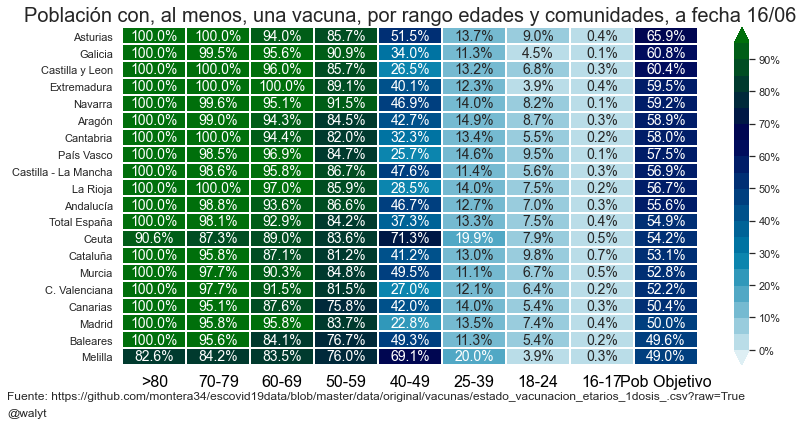

In [71]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
datos = datos.sort_values('Pob Objetivo',ascending=False)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(datos, annot=True, fmt='0.1%',linewidths=1, cmap=cmap,cbar=True,norm=norm,annot_kws={"fontsize":14,'weight':'normal'},ax=ax)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_texto,rotation=0)
ax.set_title(titulo,fontsize=20)
f.subplots_adjust(top=.9,bottom=.2)
ax.text(-.2,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')
ax.text(-.2,-.15,autor, transform=ax.transAxes, fontsize=12)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
cbar.set_ticklabels(["0%","10%","20%","30%","40%",'50%','60%','70%','80%','90%','100%'])

# here set the labelsize by 20

#cbar.ax.set_yticklabels([12])
f.tight_layout()
f.savefig(path_img+'heatmap_vacunas_1_comunidades_edades.png',dpi=144)

# Dumbbell con las vacunaciones por Comunidad y por Rangos edad: empezamos por al menos una vacuna

In [213]:
path_img = '/Users/mharias/Documents/proyectos/covid/vacunacion/graficos/'

In [214]:
def datos_vacunacion_1_porcentajes(fecha):
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    fecha_str = fecha.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == fecha_str]
    datos = datos [['ccaa', '%','%.1', '%.2', '%.3', '%.4', '%.5','%.6','% Con al menos 1 dosis sobre Población a Vacunar INE']]
    datos.columns = ['ccaa','>80','70-79','60-69','50-59','25-49','18-24','16-17','Pob Objetivo']
    datos.set_index('ccaa',inplace=True)
    datos = datos[datos.index!='Fuerzas Armadas']
    for columna in datos.columns:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    return datos.reset_index()

In [79]:
hoy = datetime.today()
hoy=datetime(year=2021,month=5,day=27)
hoy_str = hoy.strftime('%d de %b')


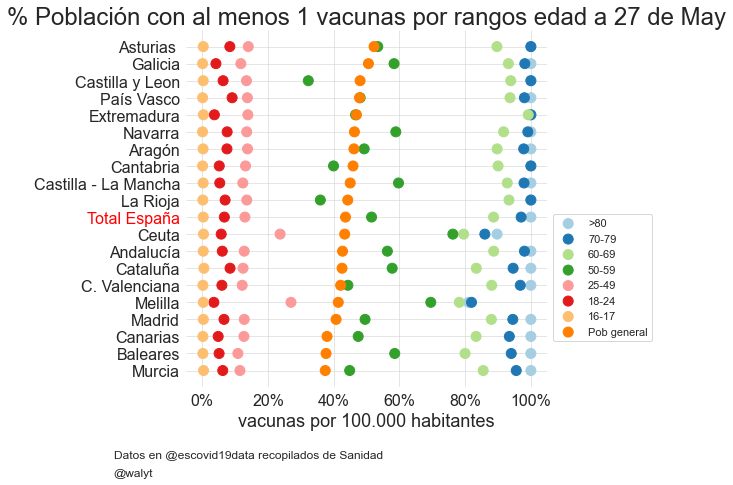

In [80]:
datos_ = datos_vacunacion_1_porcentajes(hoy).sort_values('Pob Objetivo')

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con al menos 1 vacunas por rangos edad'

fuente ='Datos en @escovid19data recopilados de Sanidad'
autor='@walyt'

#datos_=datos.sort_values('Pob Objetivo').copy()

colores_bolas = sns.color_palette("Paired",8)
colores_rojos = sns.color_palette('rocket',8)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))


c = [colores_bolas[0] for i in datos_.index]
ax.scatter(datos_['>80'], my_range, color=c, alpha=1 ,s=100, label='>80')

c = [colores_bolas[1] for i in datos_.index]
ax.scatter(datos_['70-79'], my_range, color=c, alpha=1 ,s=100, label='70-79')

c = [colores_bolas[2] for i in datos_.index]
ax.scatter(datos_['60-69'], my_range, color=c, alpha=1, s=100,label='60-69')

c = [colores_bolas[3]  for i in datos_.index]
ax.scatter(datos_['50-59'], my_range, color=c, alpha=1 ,s=100, label='50-59')

c = [colores_bolas[4]  for i in datos_.index]
ax.scatter(datos_['25-49'], my_range, color=c, alpha=1 ,s=100, label='25-49')

c = [colores_bolas[5] for i in datos_.index]
ax.scatter(datos_['18-24'], my_range, color=c, alpha=1 ,s=100, label='18-24')

c = [colores_bolas[6]  for i in datos_.index]
ax.scatter(datos_['16-17'], my_range, color=c, alpha=1 ,s=100, label='16-17')



c = [colores_bolas[7] for i in datos_.index]
ax.scatter(datos_['Pob Objetivo'], my_range, color=c, alpha=1 ,s=100, label='Pob general')




#datos[datos['ccaa']=='']


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.2,.4,.6,.8,1])
ax.set_title(title+' a {}'.format(hoy_str),fontsize=24)

ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

ax.legend(bbox_to_anchor=(1, .5))

# these are matplotlib.patch.Patch properties

# place a text box in upper left in axes coords .65, .35
ax.text(-.2,-.2,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.2,-.25,autor, transform=ax.transAxes, fontsize=12)
f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_1.png',dpi=144)


In [81]:
def datos_vacunacion_completa_porcentajes(fecha):
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    
    fecha_str = fecha.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == fecha_str]
    
    datos = datos[
                ['ccaa', 
                   'Personas pauta completa >=80 años','Población INE>=80 años', '%',
                   'Personas pauta completa 70-79 años','Población INE70-79 años', '%.1',
                   'Personas pauta completa 60-69 años','Población INE60-69 años', '%.2', 
                   'Personas pauta completa 50-59 años','Población INE50-59 años', '%.3', 
                   'Personas pauta completa 25-49 años','Población INE25-49 años', '%.4', 
                   '18-24 años', 'Población INE18-24 años', '%.5', 
                   '16-17 años','Población INE16-17 años', '%.6', 
                   'Total Personas pauta completa','Total Población INE Población a Vacunar (1)','% pauta completa sobre Población a Vacunar INE']
                 ]
    
    datos.columns = ['ccaa',
                     'Pob dosis tot >80','Pob > 80', '%>80',
                     'Pob dosis tot 70-79','Pob 70-79', '%70-79',
                     'Pob dosis tot 60-69','Pob 60-69', '%60-69',
                     'Pob dosis tot 50-59','Pob 50-59', '%50-59',
                     'Pob dosis tot 25-49','Pob 25-49', '%25-49',
                     'Pob dosis tot 18-24','Pob 18-24', '%18-24',
                     'Pob dosis tot 16-17','Pob 16-17', '%16-17',
                     'Pob dosis tot Obj','Pob Obj', '%Pob Obj',
                     ]
    datos = datos[datos['ccaa']!='Fuerzas Armadas']
    for columna in datos.columns[1:]:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    
    return datos.reset_index()

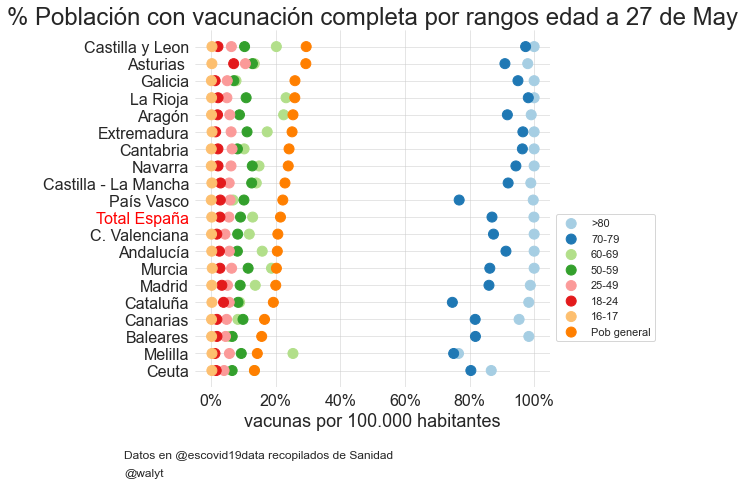

In [82]:
datos_ = datos_vacunacion_completa_porcentajes(hoy).sort_values('%Pob Obj')

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con vacunación completa por rangos edad'

fuente ='Datos en @escovid19data recopilados de Sanidad'
autor='@walyt'

#datos_=datos.sort_values('Pob Objetivo').copy()

colores_bolas = sns.color_palette("Paired",8)
colores_rojos = sns.color_palette('rocket',8)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))


c = [colores_bolas[0] for i in datos_.index]
ax.scatter(datos_['%>80'], my_range, color=c, alpha=1 ,s=100, label='>80')

c = [colores_bolas[1] for i in datos_.index]
ax.scatter(datos_['%70-79'], my_range, color=c, alpha=1 ,s=100, label='70-79')

c = [colores_bolas[2] for i in datos_.index]
ax.scatter(datos_['%60-69'], my_range, color=c, alpha=1, s=100,label='60-69')

c = [colores_bolas[3]  for i in datos_.index]
ax.scatter(datos_['%50-59'], my_range, color=c, alpha=1 ,s=100, label='50-59')

c = [colores_bolas[4]  for i in datos_.index]
ax.scatter(datos_['%25-49'], my_range, color=c, alpha=1 ,s=100, label='25-49')

c = [colores_bolas[5] for i in datos_.index]
ax.scatter(datos_['%18-24'], my_range, color=c, alpha=1 ,s=100, label='18-24')

c = [colores_bolas[6]  for i in datos_.index]
ax.scatter(datos_['%16-17'], my_range, color=c, alpha=1 ,s=100, label='16-17')



c = [colores_bolas[7] for i in datos_.index]
ax.scatter(datos_['%Pob Obj'], my_range, color=c, alpha=1 ,s=100, label='Pob general')


#datos[datos['ccaa']=='']


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.2,.4,.6,.8,1])
ax.set_title(title+' a {}'.format(hoy_str),fontsize=24)

ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

ax.legend(bbox_to_anchor=(1, .5))

# these are matplotlib.patch.Patch properties

# place a text box in upper left in axes coords .65, .35
ax.text(-.2,-.2,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.2,-.25,autor, transform=ax.transAxes, fontsize=12)
f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_completa.png',dpi=144)


## Y con los rangos resumidos: agregamos <60 años

In [83]:
def datos_vacunacion_1_resumido(fecha):
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_1dosis_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    
    fecha_str = fecha.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == fecha_str]
    
    
    datos = datos [['ccaa', 
                    'Personas con al menos 1 dosis >=80 años','Población INE>=80 años', '%',
                    'Personas con al menos 1 dosis 70-79 años','Población INE70-79 años','%.1', 
                    'Personas con al menos 1 dosis 60-69 años','Población INE60-69 años', '%.2',
                    'Personas con al menos 1 dosis 50-59 años', 'Población INE50-59 años','%.3', 
                    'Personas con al menos 1 dosis 25-49 años','Población INE25-49 años', '%.4', 
                    '18-24 años','Población INE18-24 años', '%.5', 
                    '16-17 años','Población INE16-17 años', '%.6', 
                    'Total Personas con al menos 1 dosis','Total Población INE Población a Vacunar (1)', '% Con al menos 1 dosis sobre Población a Vacunar INE']]
    datos.columns = ['ccaa',
                     'Pob 1 dosis >80','Pob > 80', '%>80',
                     'Pob 1 dosis 70-79','Pob 70-79', '%70-79',
                     'Pob 1 dosis 60-69','Pob 60-69', '%60-69',
                     'Pob 1 dosis 50-59','Pob 50-59', '%50-59',
                     'Pob 1 dosis 25-49','Pob 25-49', '%25-49',
                     'Pob 1 dosis 18-24','Pob 18-24', '%18-24',
                     'Pob 1 dosis 16-17','Pob 16-17', '%16-17',
                     'Pob 1 dosis Obj','Pob Obj', '%Pob Obj',
                     ]
    datos = datos[datos['ccaa']!='Fuerzas Armadas']
    for columna in datos.columns[1:]:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    
    datos.loc[:,'Pob 1 dosis <60'] = datos.apply(lambda x:x['Pob 1 dosis 50-59']+x['Pob 1 dosis 25-49']\
                                                 +x['Pob 1 dosis 18-24']+x['Pob 1 dosis 16-17'],axis=1)
    datos.loc[:,'Pob <60'] = datos.apply(lambda x:x['Pob 50-59']+x['Pob 25-49']+x['Pob 18-24']+x['Pob 16-17'],axis=1)
    datos.loc[:,'%<60'] = datos.loc[:,'Pob 1 dosis <60'] / datos.loc[:,'Pob <60']
    #datos.set_index('ccaa',inplace=True)
    return datos

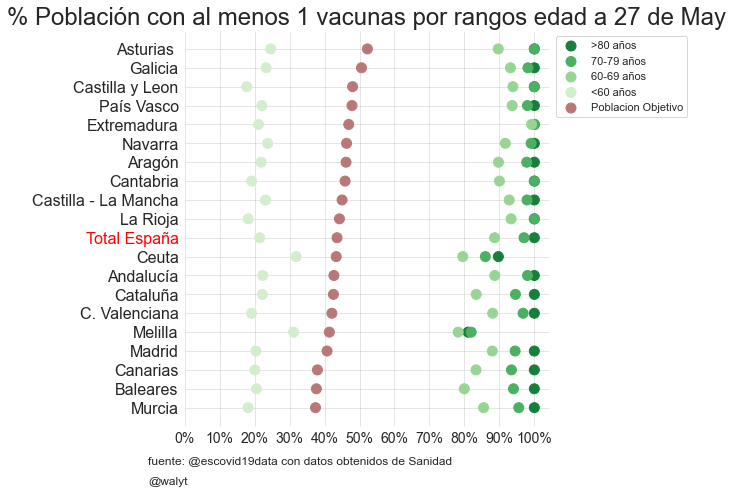

In [84]:
sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con al menos 1 vacunas por rangos edad'

autor='@walyt'
fuente ='fuente: @escovid19data con datos obtenidos de Sanidad'

datos_ = datos_vacunacion_1_resumido(hoy).sort_values('%Pob Obj')
#colores_bolas = sns.color_palette("Paired",5)
colores_bolas = sns.color_palette("Greens_r",4)
#colores_bolas = sns.color_palette("Blues_r",5)
colores_rojos = sns.color_palette('pink',5)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos_.index)+1)
f, ax = plt.subplots(figsize=(10, 7))

valor_alpha =  1.0
size_marker = 100
c = [colores_bolas[0] for i in datos_.index]
#c = [colores_bolas[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%>80'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='>80 años')

c = [colores_bolas[1] for i in datos_.index]
#c = [colores_bolas[1]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[1] for i in datos_.index]
ax.scatter(datos_['%70-79'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='70-79 años')

c = [colores_bolas[2] for i in datos_.index]
#c = [colores_bolas[2]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[2] for i in datos_.index]
ax.scatter(datos_['%60-69'], my_range, color=c, alpha=valor_alpha, s=size_marker,label='60-69 años')

c = [colores_bolas[3]  for i in datos_.index]
#c = [colores_bolas[3]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[3] for i in datos_.index]
ax.scatter(datos_['%<60'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='<60 años')

c = [colores_rojos[1] for i in datos_.index]
#c = [colores_rojos[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%Pob Obj'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='Poblacion Objetivo')


#datos[datos['ccaa']=='']

#ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=14,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
ax.set_title(title+' a {}'.format(hoy_str),fontsize=24)

#ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")

#ax.legend(loc=4,bbox_to_anchor=(1.0, .5))
ax.legend(loc='upper center',bbox_to_anchor=(1.2,1))

# place a text box in upper left in axes coords .65, .35
ax.text(-.1,-.1,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.1,-.15,autor, transform=ax.transAxes, fontsize=12)

ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_resumido_1.png',dpi=144)

# Y por vacunaciones completas

In [85]:
def datos_vacunacion_completa_resumido(fecha):
    path_github_csv = 'https://github.com/montera34/escovid19data/blob/master/data/original/vacunas/estado_vacunacion_etarios_pauta_completa_.csv?raw=True'
    datos_raw= pd.read_csv(path_github_csv)
    datos = datos_raw.copy()
    datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')
    
    fecha_str = fecha.strftime('%Y-%m-%d')
    datos = datos[datos['date_pub'] == fecha_str]
    
    datos = datos[
                ['ccaa', 
                   'Personas pauta completa >=80 años','Población INE>=80 años', '%',
                   'Personas pauta completa 70-79 años','Población INE70-79 años', '%.1',
                   'Personas pauta completa 60-69 años','Población INE60-69 años', '%.2', 
                   'Personas pauta completa 50-59 años','Población INE50-59 años', '%.3', 
                   'Personas pauta completa 25-49 años','Población INE25-49 años', '%.4', 
                   '18-24 años', 'Población INE18-24 años', '%.5', 
                   '16-17 años','Población INE16-17 años', '%.6', 
                   'Total Personas pauta completa','Total Población INE Población a Vacunar (1)','% pauta completa sobre Población a Vacunar INE']
                 ]
    
    datos.columns = ['ccaa',
                     'Pob dosis tot >80','Pob > 80', '%>80',
                     'Pob dosis tot 70-79','Pob 70-79', '%70-79',
                     'Pob dosis tot 60-69','Pob 60-69', '%60-69',
                     'Pob dosis tot 50-59','Pob 50-59', '%50-59',
                     'Pob dosis tot 25-49','Pob 25-49', '%25-49',
                     'Pob dosis tot 18-24','Pob 18-24', '%18-24',
                     'Pob dosis tot 16-17','Pob 16-17', '%16-17',
                     'Pob dosis tot Obj','Pob Obj', '%Pob Obj',
                     ]
    datos = datos[datos['ccaa']!='Fuerzas Armadas']
    for columna in datos.columns[1:]:
        datos.loc[:,columna] = pd.to_numeric(datos.loc[:,columna])
    
    datos.loc[:,'Pob dosis tot <60'] = datos.apply(lambda x:x['Pob dosis tot 50-59']+x['Pob dosis tot 25-49']\
                                                 +x['Pob dosis tot 18-24']+x['Pob dosis tot 16-17'],axis=1)

    datos.loc[:,'Pob <60'] = datos.apply(lambda x:x['Pob 50-59']+x['Pob 25-49']+x['Pob 18-24']+x['Pob 16-17'],axis=1)
    datos.loc[:,'%<60'] = datos.loc[:,'Pob dosis tot <60'] / datos.loc[:,'Pob <60']
    
    
    return datos

In [86]:
datos_= datos_vacunacion_completa_resumido(hoy)

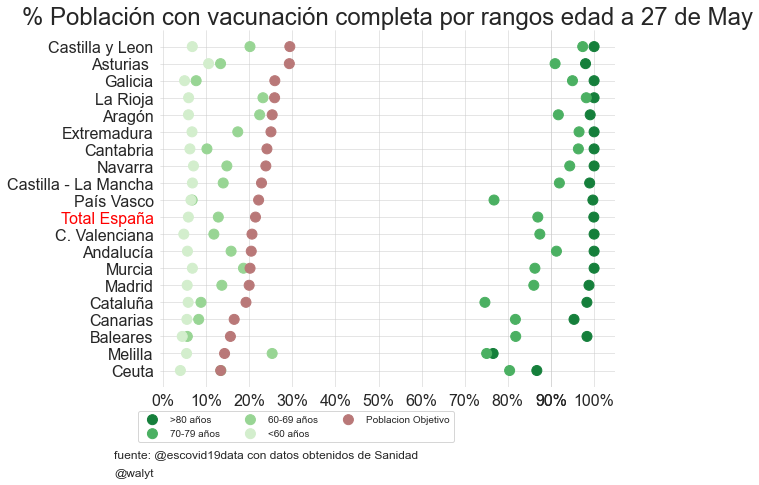

In [87]:
sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= '% Población con vacunación completa por rangos edad'

autor='@walyt'
fuente ='fuente: @escovid19data con datos obtenidos de Sanidad'

datos_ = datos_vacunacion_completa_resumido(hoy).sort_values('%Pob Obj')
#colores_bolas = sns.color_palette("Paired",5)
colores_bolas = sns.color_palette("Greens_r",4)
#colores_bolas = sns.color_palette("Blues_r",5)
colores_rojos = sns.color_palette('pink',5)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos_.index)+1)
f, ax = plt.subplots(figsize=(10, 7))

valor_alpha =  1.0
size_marker = 100
c = [colores_bolas[0] for i in datos_.index]
#c = [colores_bolas[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%>80'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='>80 años')

c = [colores_bolas[1] for i in datos_.index]
#c = [colores_bolas[1]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[1] for i in datos_.index]
ax.scatter(datos_['%70-79'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='70-79 años')

c = [colores_bolas[2] for i in datos_.index]
#c = [colores_bolas[2]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[2] for i in datos_.index]
ax.scatter(datos_['%60-69'], my_range, color=c, alpha=valor_alpha, s=size_marker,label='60-69 años')

c = [colores_bolas[3]  for i in datos_.index]
#c = [colores_bolas[3]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[3] for i in datos_.index]
ax.scatter(datos_['%<60'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='<60 años')

c = [colores_rojos[1] for i in datos_.index]
#c = [colores_rojos[0]  if datos_.loc[i,'ccaa']!='Total España' else colores_rojos[0] for i in datos_.index]
ax.scatter(datos_['%Pob Obj'], my_range, color=c, alpha=valor_alpha ,s=size_marker, label='Poblacion Objetivo')


#datos[datos['ccaa']=='']

#ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0%}'.format(v).replace(',','.')))

ax.set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.9,1])
ax.set_title(title+' a {}'.format(hoy_str),fontsize=24)

#ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos_['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")

#ax.legend(loc=4,bbox_to_anchor=(1.0, .5))

ax.legend(loc='lower center',ncol=3,bbox_to_anchor=(0.3,-.17),fontsize='small')
# place a text box in upper left in axes coords .65, .35
ax.text(-.1,-.2,fuente,transform=ax.transAxes, fontsize=12,ha='left')

ax.text(-.1,-.25,autor, transform=ax.transAxes, fontsize=12)

ax.get_yticklabels()[datos_.index.get_loc(datos_[datos_['ccaa']=='Total España'].index.values[0])].set_color("red")


f.subplots_adjust(top=.9,bottom=.14,wspace=0.0,hspace=0.15)
f.tight_layout()
f.savefig(path_img+'dumbbell_rangoedades_resumido_total.png',dpi=144)